<a href="https://colab.research.google.com/github/Aytijha/Caramel_Popcorn_Movie_Time/blob/main/NLP_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import gensim
from gensim.models import Word2Vec

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
import pandas as pd
nlp_df = pd.read_csv('NLP DF.csv')
nlp_df

,Unnamed: 0,Name of movie,Description,Genre
0,0,The Shawshank Redemption,Two imprisoned men bond over a number of years...,Drama
1,1,The Godfather,An organized crime dynasty's aging patriarch t...,Crime Drama
2,2,Soorarai Pottru,"Nedumaaran Rajangam ""Maara"" sets out to make t...",Drama
3,3,The Dark Knight,When the menace known as the Joker wreaks havo...,Action Crime Drama
4,4,The Godfather: Part II,The early life and career of Vito Corleone in ...,Crime Drama
...,...,...,...,...
995,995,Giant,Sprawling epic covering the life of a Texas ca...,Drama Western
996,996,From Here to Eternity,"In Hawaii in 1941, a private is cruelly punish...",Drama Romance War
997,997,Gilda,A small-time gambler hired to work in a Buenos...,Drama Film-Noir Romance
998,998,Lifeboat,Several survivors of a torpedoed merchant ship...,Drama War


In [3]:
nlp_df.drop('Unnamed: 0', inplace=True, axis=1)

In [4]:
nlp_df

,Name of movie,Description,Genre
0,The Shawshank Redemption,Two imprisoned men bond over a number of years...,Drama
1,The Godfather,An organized crime dynasty's aging patriarch t...,Crime Drama
2,Soorarai Pottru,"Nedumaaran Rajangam ""Maara"" sets out to make t...",Drama
3,The Dark Knight,When the menace known as the Joker wreaks havo...,Action Crime Drama
4,The Godfather: Part II,The early life and career of Vito Corleone in ...,Crime Drama
...,...,...,...
995,Giant,Sprawling epic covering the life of a Texas ca...,Drama Western
996,From Here to Eternity,"In Hawaii in 1941, a private is cruelly punish...",Drama Romance War
997,Gilda,A small-time gambler hired to work in a Buenos...,Drama Film-Noir Romance
998,Lifeboat,Several survivors of a torpedoed merchant ship...,Drama War


In [5]:
d = dict(nlp_df['Genre'].value_counts())
#d

In [6]:
nlp_df['Text'] = nlp_df['Name of movie'] + ' ' + nlp_df['Description']
nlp_df

,Name of movie,Description,Genre,Text
0,The Shawshank Redemption,Two imprisoned men bond over a number of years...,Drama,The Shawshank Redemption Two imprisoned men bo...
1,The Godfather,An organized crime dynasty's aging patriarch t...,Crime Drama,The Godfather An organized crime dynasty's agi...
2,Soorarai Pottru,"Nedumaaran Rajangam ""Maara"" sets out to make t...",Drama,"Soorarai Pottru Nedumaaran Rajangam ""Maara"" se..."
3,The Dark Knight,When the menace known as the Joker wreaks havo...,Action Crime Drama,The Dark Knight When the menace known as the J...
4,The Godfather: Part II,The early life and career of Vito Corleone in ...,Crime Drama,The Godfather: Part II The early life and care...
...,...,...,...,...
995,Giant,Sprawling epic covering the life of a Texas ca...,Drama Western,Giant Sprawling epic covering the life of a Te...
996,From Here to Eternity,"In Hawaii in 1941, a private is cruelly punish...",Drama Romance War,"From Here to Eternity In Hawaii in 1941, a pri..."
997,Gilda,A small-time gambler hired to work in a Buenos...,Drama Film-Noir Romance,Gilda A small-time gambler hired to work in a ...
998,Lifeboat,Several survivors of a torpedoed merchant ship...,Drama War,Lifeboat Several survivors of a torpedoed merc...


In [7]:
# converting text to lowercase, stripping and removing punctuations
def preprocess(text):
    text = text.lower() 
    text=text.strip()  
    text=re.compile('<.*?>').sub('', text) 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  
    text = re.sub('\s+', ' ', text)  
    text = re.sub(r'\[[0-9]*\]',' ',text) 
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) 
    text = re.sub(r'\s+',' ',text) 
    return text

In [8]:
# removing stopwords
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)

In [9]:
# lemmatization
wl = WordNetLemmatizer()
 
# helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# to tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))
nlp_df['clean_text'] = nlp_df['Text'].apply(lambda x: finalpreprocess(x))
nlp_df

,Name of movie,Description,Genre,Text,clean_text
0,The Shawshank Redemption,Two imprisoned men bond over a number of years...,Drama,The Shawshank Redemption Two imprisoned men bo...,shawshank redemption two imprisoned men bond n...
1,The Godfather,An organized crime dynasty's aging patriarch t...,Crime Drama,The Godfather An organized crime dynasty's agi...,godfather organize crime dynasty age patriarch...
2,Soorarai Pottru,"Nedumaaran Rajangam ""Maara"" sets out to make t...",Drama,"Soorarai Pottru Nedumaaran Rajangam ""Maara"" se...",soorarai pottru nedumaaran rajangam maara set ...
3,The Dark Knight,When the menace known as the Joker wreaks havo...,Action Crime Drama,The Dark Knight When the menace known as the J...,dark knight menace know joker wreaks havoc cha...
4,The Godfather: Part II,The early life and career of Vito Corleone in ...,Crime Drama,The Godfather: Part II The early life and care...,godfather part ii early life career vito corle...
...,...,...,...,...,...
995,Giant,Sprawling epic covering the life of a Texas ca...,Drama Western,Giant Sprawling epic covering the life of a Te...,giant sprawl epic cover life texas cattle ranc...
996,From Here to Eternity,"In Hawaii in 1941, a private is cruelly punish...",Drama Romance War,"From Here to Eternity In Hawaii in 1941, a pri...",eternity hawaii private cruelly punish box uni...
997,Gilda,A small-time gambler hired to work in a Buenos...,Drama Film-Noir Romance,Gilda A small-time gambler hired to work in a ...,gilda small time gambler hire work buenos air ...
998,Lifeboat,Several survivors of a torpedoed merchant ship...,Drama War,Lifeboat Several survivors of a torpedoed merc...,lifeboat several survivor torpedo merchant shi...


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(nlp_df['clean_text'], nlp_df['Genre'], test_size=0.15)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(850,) (150,) (850,) (150,)


In [13]:
#Tf-Idf
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) 
X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test)

In [17]:
#FITTING THE CLASSIFICATION MODEL using Naive Bayes(tf-idf)
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_vectors_tfidf, y_train)  
#Predict y value for test dataset
y_predict = nb_tfidf.predict(X_test_vectors_tfidf)
y_prob = nb_tfidf.predict_proba(X_test_vectors_tfidf)[:,1]
#print(classification_report(y_test,y_predict))
#print('Confusion Matrix:',confusion_matrix(y_test, y_predict))

print(accuracy_score(y_test, y_predict))
 
'''fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)'''

0.09333333333333334


"fpr, tpr, thresholds = roc_curve(y_test, y_prob)\nroc_auc = auc(fpr, tpr)\nprint('AUC:', roc_auc)"

In [18]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression(tf-idf)
lr_tfidf=LogisticRegression()
lr_tfidf.fit(X_train_vectors_tfidf, y_train)  
#Predict y value for test dataset
y_predict = lr_tfidf.predict(X_test_vectors_tfidf)
y_prob = lr_tfidf.predict_proba(X_test_vectors_tfidf)[:,1]
#print(classification_report(y_test,y_predict))
#print('Confusion Matrix:',confusion_matrix(y_test, y_predict))

print(accuracy_score(y_test, y_predict))

0.09333333333333334


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class

>0.0000 nan (nan)
>0.0001 nan (nan)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class

>0.0010 nan (nan)
>0.0100 nan (nan)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class

>0.1000 nan (nan)
>1.0000 nan (nan)


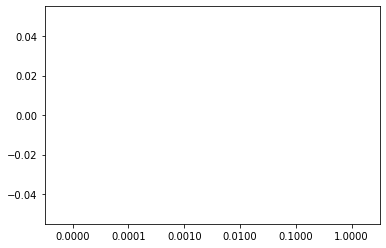

In [19]:
# tune regularization for multinomial logistic regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# get a list of models to evaluate
def get_models():
	models = dict()
	for p in [0.0, 0.0001, 0.001, 0.01, 0.1, 1.0]:
		# create name for model
		key = '%.4f' % p
		# turn off penalty in some cases
		if p == 0.0:
			# no penalty in this case
			models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='none')
		else:
			models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=p)
	return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = X_train, y_train
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model and collect the scores
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize progress along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()